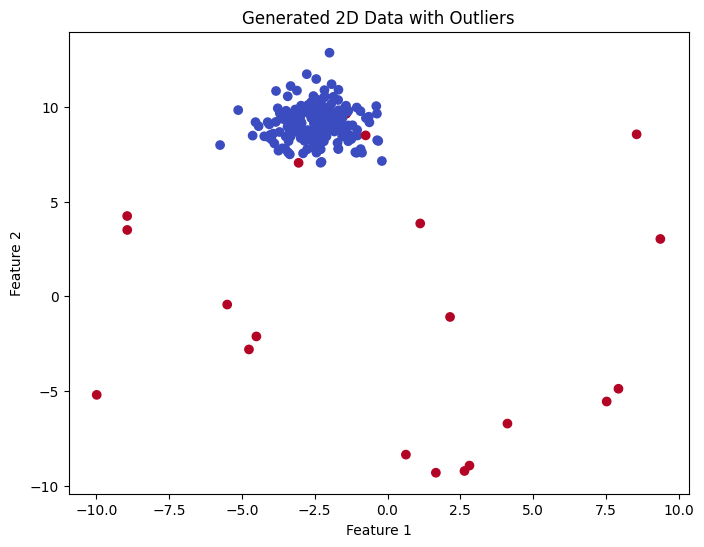

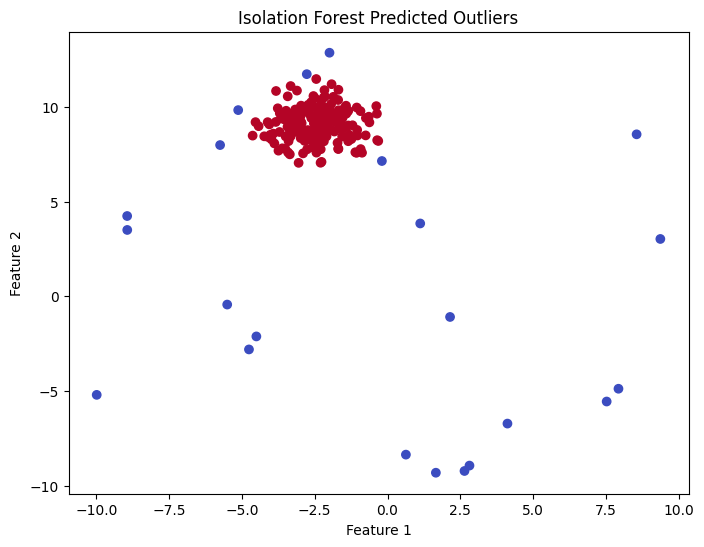

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.ensemble import IsolationForest

# Part 1: Generate 2D Data with Adjustable Outliers

def generate_2d_data(n_samples, n_features, n_outliers, random_state=42):
    """
    Generate synthetic 2D data with adjustable outliers.
    
    Args:
        n_samples (int): Number of samples in the dataset.
        n_features (int): Number of features in the dataset.
        n_outliers (int): Number of outlier samples to add to the dataset.
        random_state (int): Random seed for reproducibility.
    
    Returns:
        X (array-like): Generated data points with shape (n_samples, n_features).
        y (array-like): Labels indicating whether each sample is an outlier (1) or not (0).
    """
    # Generate blob-shaped data points
    X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=1, random_state=random_state)
    
    # Add outliers to the data
    outlier_indices = np.random.choice(range(n_samples), size=n_outliers, replace=False)
    X[outlier_indices] = np.random.uniform(low=-10, high=10, size=(n_outliers, n_features))
    y[outlier_indices] = 1
    
    return X, y


# Generate 2D data with adjustable outliers
n_samples = 200
n_features = 2
n_outliers = 20

X, y = generate_2d_data(n_samples=n_samples, n_features=n_features, n_outliers=n_outliers, random_state=42)

# Visualize the generated data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title("Generated 2D Data with Outliers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# Part 2: Use Isolation Forest to Detect Outliers

# Create an Isolation Forest model
isolation_forest = IsolationForest(contamination='auto', random_state=42)

# Fit the model to the data
isolation_forest.fit(X)

# Predict outliers using the trained model
y_pred = isolation_forest.predict(X)

# Visualize the predicted outliers
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm')
plt.title("Isolation Forest Predicted Outliers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
